In [2]:
import csv
import matplotlib.pyplot as plt
import matplotlib.axes
import numpy
import math
import decimal

- empty_tick=5[harvest_period,height_limit]1629940583.csv
- empty_tick=5[harvest_period,height_limit]output_by_ishland.csv
- empty_tick=5[harvest_period,height_limit]output_by_ishland_reordered.csv
- empty_tick=5[harvest_period,height_limit]Thu Aug 26 08.15.01 2021.csv

In [9]:
path = './empty_tick=5[harvest_period,height_limit]output_by_ishland_reordered'

In [10]:
path = './empty_tick=5[harvest_period,height_limit]1629959120'

In [11]:
path = './empty_tick=5[harvest_period,height_limit]1630152247'

In [12]:
path = './output@2021-08-28_00.15_reordered'

In [13]:
path = './output@2021-08-28_11.47_reordered'

In [10]:
path = './output@2021-08-31_18.48_reordered'

In [11]:

def read_csv(csvpath) -> dict:
    re = {
        'first_label' : '',
        'second_label' : '',
        'first_axis' : [],
        'second_axis' : [],
        'values' : {}
    }  
    with open(csvpath, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        first_row = next(reader)
        [re['second_label'], re['first_label']] = first_row[0].split('|')
        re['first_axis'] = first_row[1:]
        for row in reader:
            re['second_axis'].append(row[0])
            re['values'][row[0]] = list(float(str) for str in row[1:])
    return re


result = read_csv(path + '.csv')

7200


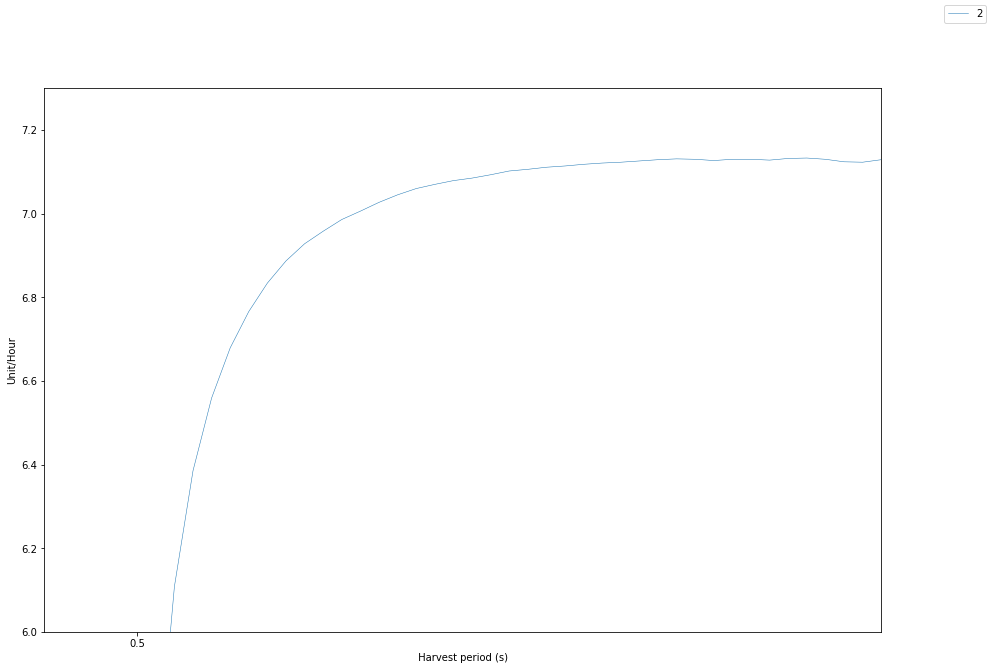

In [13]:
def to_float_list(t: list) -> list:
    re = []
    for val in t:
        re.append(float(val))
    return re

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
fig.set_facecolor('white')

'''for key in result['second_axis']:
    re = []
    for i in range(len(result['values'][key]) - 1):
        if result['values'][key][i] > 0 and result['values'][key][i+1] > 0:
            re.append(result['values'][key][i+1] - result['values'][key][i] / result['values'][key][i])
    result['values'][key] = re'''
start = 0
end = len(result['first_axis']) - 1

# start = 500
# end = 600

print(len(result['first_axis']))
i = 0
for key in result['second_axis']:
    i += 1
    if i != 1: 
        continue
    ax.plot(result['first_axis'][start:end], result['values'][key][start:end], label=key, lw = 0.5)
#ax.minorticks_on()
#ax.set_xticks(result['first_axis'][1000:1100:int(len(result['first_axis'])/12)])
ax.set_xticks(result['first_axis'][start:end:int((end - start)/12)])
ax.set_xlabel(result['first_label'])
ax.set_ylabel('Unit/Hour')
fig.legend()

#ax.set_xbound(-5,40)
#ax.set_ybound(6,7.3)


[<AxesSubplot:> <AxesSubplot:>]
<class 'numpy.ndarray'>
[array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)]
(0, 0)


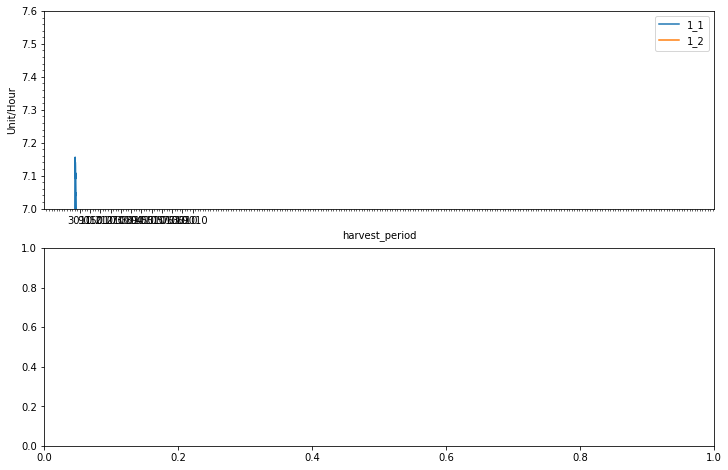

In [49]:
# measure error
path1 = 'empty_tick=5[harvest_period,height_limit]1630152247.csv'
path2 = 'output@2021-08-28_11.47_reordered.csv'
result1 = read_csv(path1)
result2 = read_csv(path2)

rows = round(math.sqrt(len(result1['second_axis']))) + 1
cols = int(math.sqrt(len(result1['second_axis'])))
fig , ax = plt.subplots(rows, cols)
fig.set_size_inches(12,8)
fig.set_facecolor('white')
print(ax)
if type(ax) != list:
    ax = [ax]
for ax_ in ax:
    print(type(ax_))
    if type(ax_) != list:
        ax_ = [ax_]
print(ax)

for i in range(len(result1['second_axis'])):
    ax_row, ax_col = (int(i / cols), i % cols)
    print((ax_row,ax_col))
    ax[ax_row][ax_col].plot(result1['first_axis'], result1['values'][list(result1['values'].keys())[i]], label=list(result1['values'].keys())[i] + '_1')
    ax[ax_row][ax_col].plot(result2['first_axis'], result2['values'][list(result2['values'].keys())[i]], label=list(result1['values'].keys())[i] + '_2')
    ax[ax_row][ax_col].set_ybound([7,7.6])
    ax[ax_row][ax_col].set_xlabel(result1['first_label'])
    ax[ax_row][ax_col].set_ylabel('Unit/Hour')
    ax[ax_row][ax_col].set_xticks(result1['first_axis'][int(len(result1['first_axis'])/24)::int(len(result1['first_axis'])/12)])
    ax[ax_row][ax_col].minorticks_on()
    ax[ax_row][ax_col].legend()
    break


[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0]


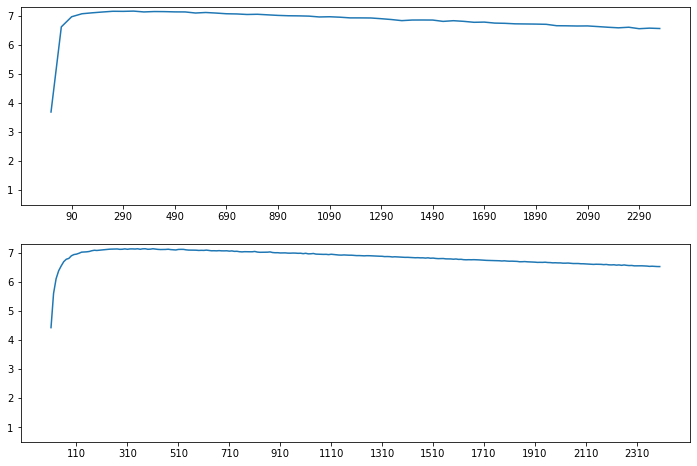

In [ ]:
# measure error
path1 = 'empty_tick=5[harvest_period,height_limit]1630152247.csv'
path2 = 'output@2021-08-29_19.09_reordered.csv'
result1 = read_csv(path1)
result2 = read_csv(path2)

for val in result1['first_axis']:
    val = int(val)
    
for i in range(len(result2['first_axis'])):
    result2['first_axis'][i] = float(float(result2['first_axis'][i]) * 20)

print(result2['first_axis'][0:20])

fig , ax = plt.subplots(2,1)
fig.set_size_inches(12,8)
fig.set_facecolor('white')

len1 = len(result1['first_axis']) - 1
len2 = len(result2['first_axis']) - 1

#len1, len2 = 60,240

ax[0].plot(result1['first_axis'][0:len1], result1['values']['1'][0:len1])
ax[1].plot(result2['first_axis'][0:len2], result2['values']['2'][0:len2])

ax[0].set_xticks(result1['first_axis'][int(len1/24):len1:int(len1/12)])
ax[1].set_xticks(result2['first_axis'][int(len2/24):len2:int(len2/12)])
ax[0].set_ybound(0.5,7.3)
ax[1].set_ybound(0.5,7.3)


In [ ]:
fig, ax = plt.subplots()
plt.plot(result['first_axis'], result['values']['16'])